In [5]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#labels表示你不同类别的代号，比如这里的demo中有13个类别
labels = ['A', 'B', 'Normal']

'''
具体解释一下re_label.txt和pr_label.txt这两个文件，比如你有100个样本
去做预测，这100个样本中一共有10类，那么首先这100个样本的真实label你一定
是知道的，一共有10个类别，用[0,9]表示，则re_label.txt文件中应该有100
个数字，第n个数字代表的是第n个样本的真实label（100个样本自然就有100个
数字）。
同理，pr_label.txt里面也应该有1--个数字，第n个数字代表的是第n个样本经过
你训练好的网络预测出来的预测label。
这样，re_label.txt和pr_label.txt这两个文件分别代表了你样本的真实label和预测label，然后读到y_true和y_pred这两个变量中计算后面的混淆矩阵。当然，不一定非要使用这种txt格式的文件读入的方式，只要你最后将你的真实
label和预测label分别保存到y_true和y_pred这两个变量中即可。
'''
#y_true = np.loadtxt('2.txt')
#y_pred = np.loadtxt('1.txt')
y_true = pd.read_excel('pls1Dggp-y_test.xlsx', header=None).values
y_pred = pd.read_excel('pls1Dggp-Y_pred.xlsx', header=None).values

[[0.15 0.85 0.  ]
 [0.09 0.87 0.04]
 [0.   0.74 0.26]]


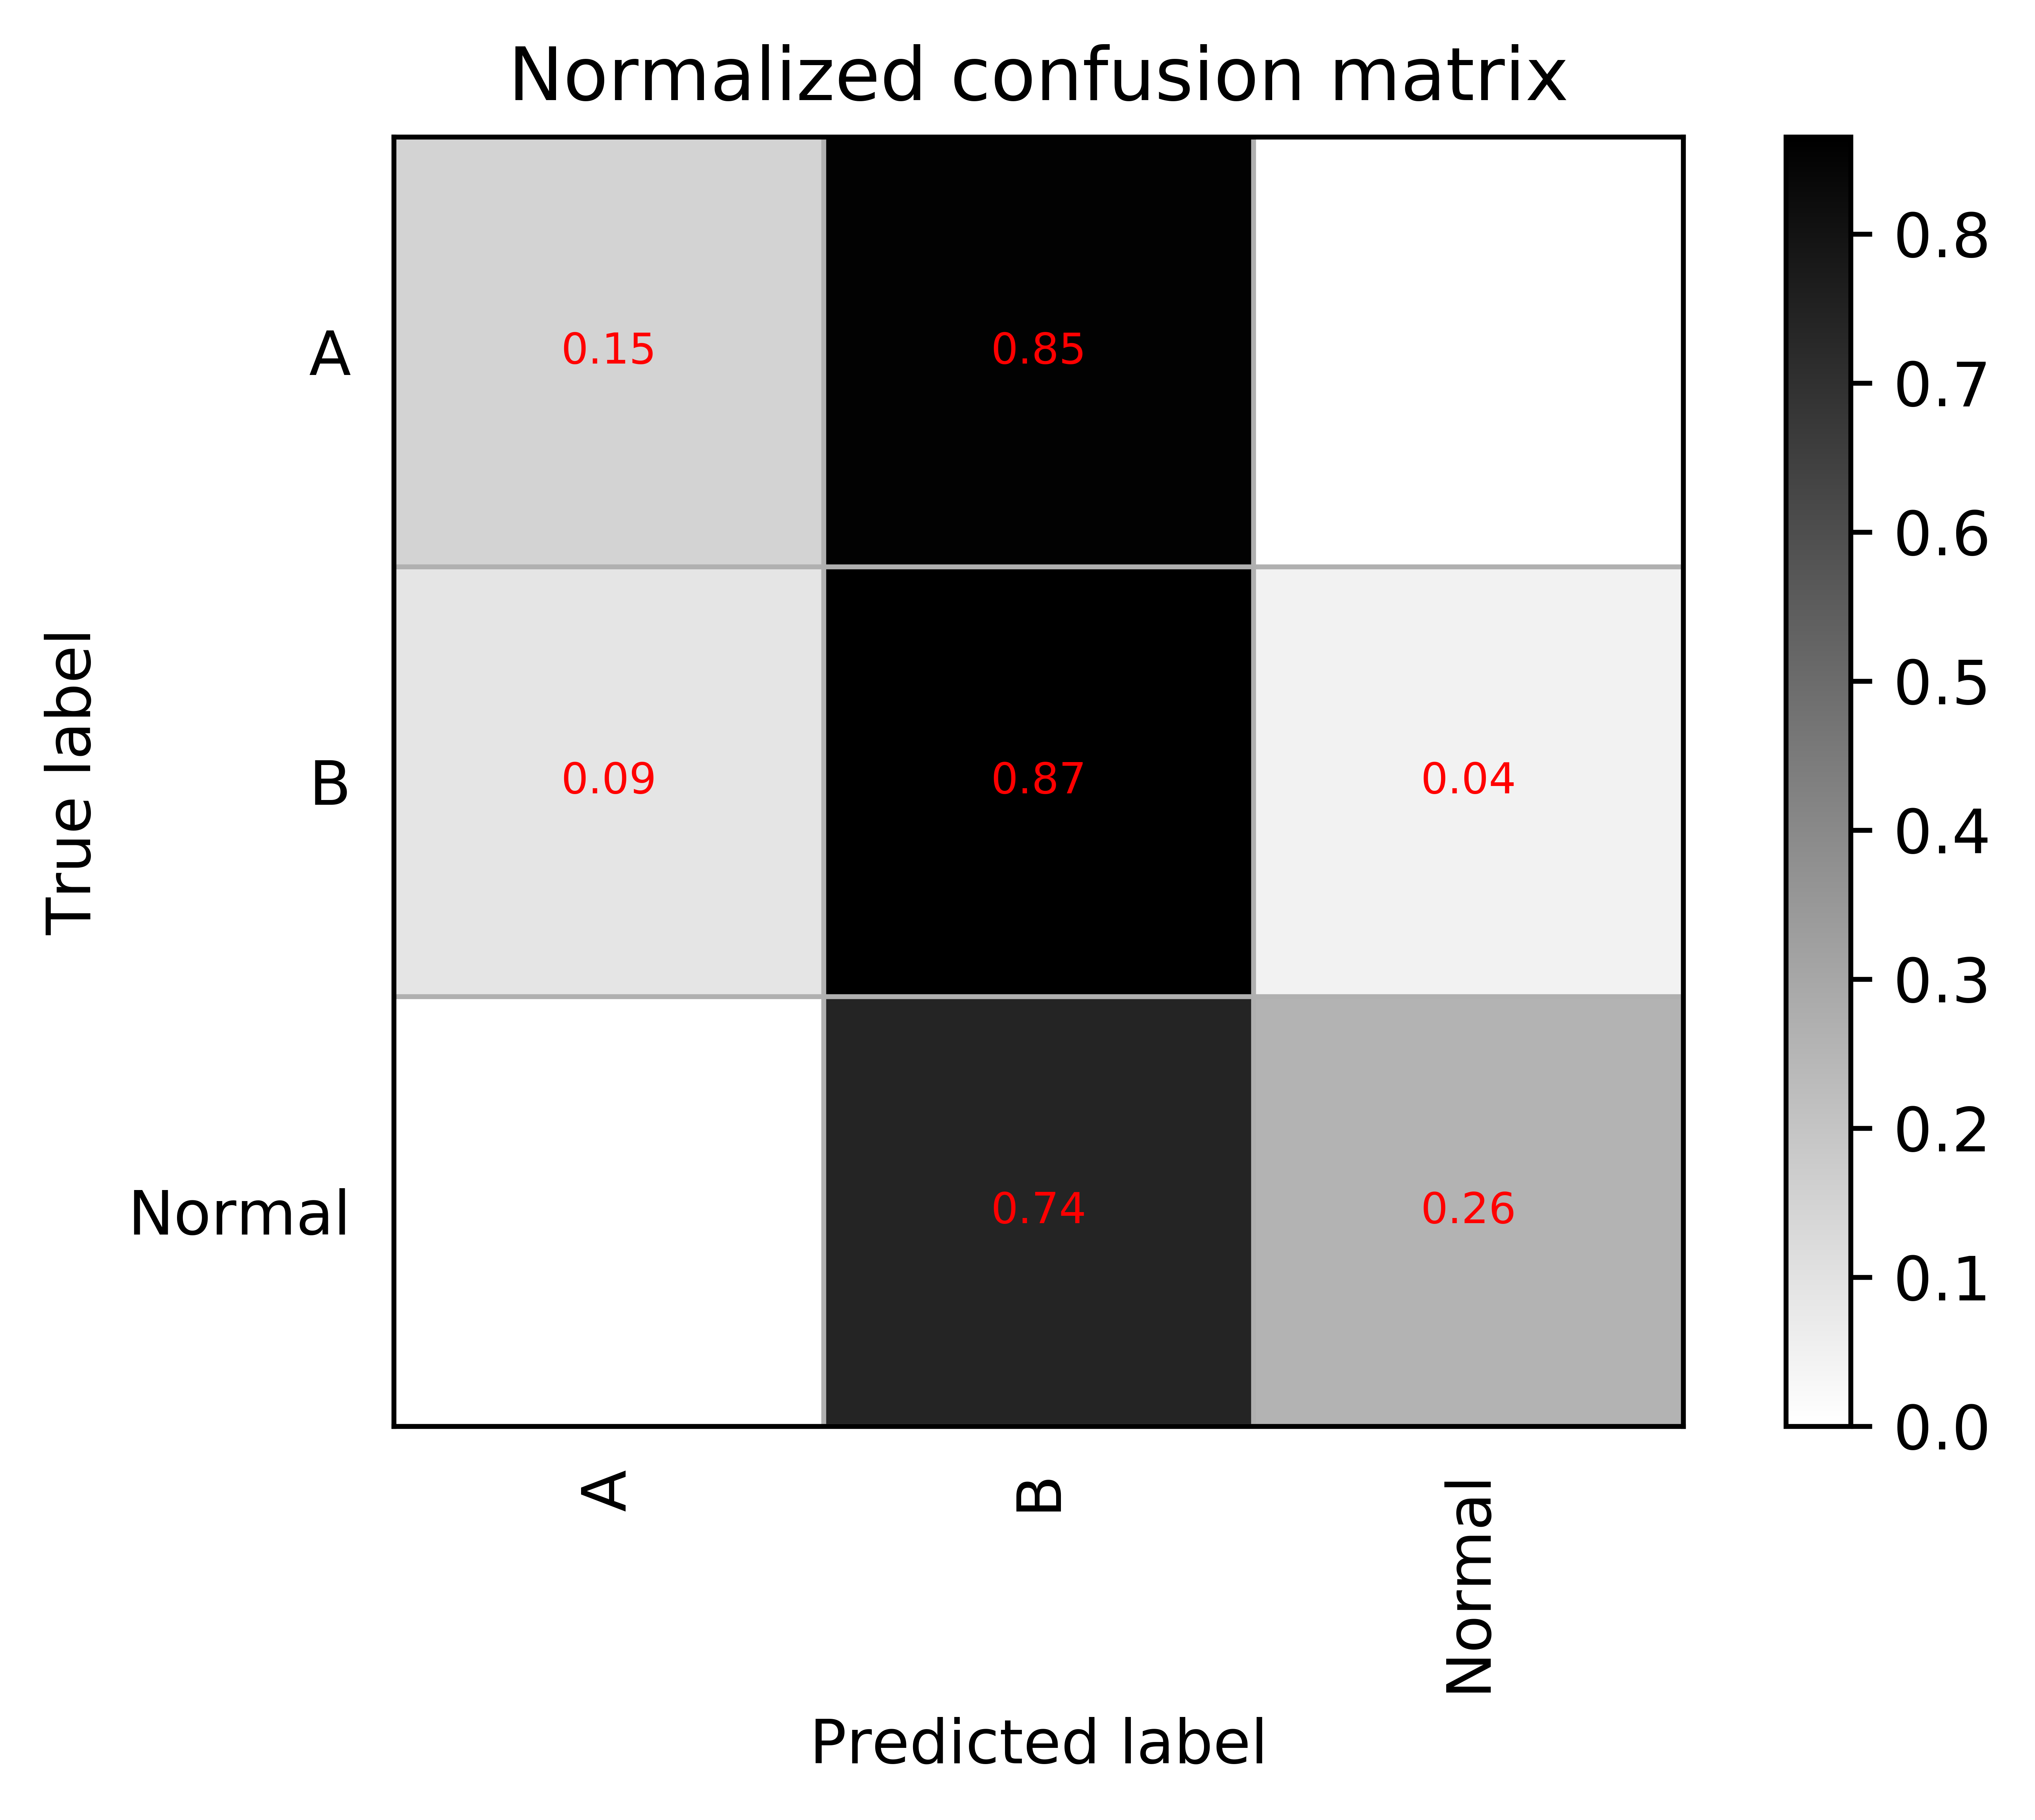

In [6]:
tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(dpi=1200)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.01:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.savefig('pls1Dggp.jpg', format='jpg',dpi = 1000)
plt.show()
